In [1]:
import pandas as pd
from matplotlib import pyplot, ticker
import pybaselines
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# tick
pyplot.rcParams["xtick.bottom"] = True  # 下軸目盛の表示
pyplot.rcParams["xtick.top"] = True  # 上軸目盛の表示
pyplot.rcParams["ytick.left"] = True  # 左軸目盛の表示
pyplot.rcParams["ytick.right"] = True  # 右軸目盛の表示
pyplot.rcParams["xtick.direction"] = "in"  # 縦軸目盛の向き
pyplot.rcParams["ytick.direction"] = "in"  # 横軸目盛の向き
pyplot.rcParams["xtick.major.size"] = 10  # 横軸主目盛の長さ
pyplot.rcParams["ytick.major.size"] = 10  # 縦軸主目盛の長さ
pyplot.rcParams["xtick.minor.size"] = 5  # 横軸副目盛の長さ
pyplot.rcParams["ytick.minor.size"] = 5  # 縦軸副目盛の長さ
# line
pyplot.rcParams["lines.linewidth"] = 2  # 折れ線グラフの太さ
pyplot.rcParams["axes.linewidth"] = 2  # 軸線の太さ
pyplot.rcParams["xtick.major.width"] = 2  # 横軸主目盛の太さ
pyplot.rcParams["ytick.major.width"] = 2  # 縦軸主目盛の太さ
pyplot.rcParams["xtick.minor.width"] = 2  # 横軸副目盛の太さ
pyplot.rcParams["ytick.minor.width"] = 2  # 縦軸副目盛の太さ
# pad
pyplot.rcParams["axes.labelpad"] = 5  # タイトルの軸からの距離
pyplot.rcParams["xtick.major.pad"] = 10  # 横軸目盛の軸からの距離
pyplot.rcParams["ytick.major.pad"] = 10  # 縦軸目盛の軸からの距離
# save
pyplot.rcParams["savefig.format"] = "png"
pyplot.rcParams["savefig.dpi"] = 150
pyplot.rcParams["savefig.transparent"] = False
pyplot.rcParams["savefig.bbox"] = "tight"
# フォント
pyplot.rcParams["font.size"] = "20"  # フォントサイズ
font = 3  # フォント指定
if font == 1: pyplot.rcParams["font.family"] = "Times New Roman"  # セリフフォント
if font == 2: pyplot.rcParams["font.family"] = "Arial"  # サンセリフフォント
if font == 3: pyplot.rcParams["font.family"] = "Meiryo"  # 日本語フォント
print("size =", pyplot.rcParams["font.size"], "\nfont =", pyplot.rcParams["font.family"][0])

size = 20.0 
font = Meiryo


In [3]:
import math

def calculate_penetration_depth(wavenumber, n_sample, n_prism, incident_angle_deg):
    # 波数を波長に変換 (μm)
    wavelength = 1e4 / wavenumber
    
    # 入射角をラジアンに変換
    incident_angle_rad = math.radians(incident_angle_deg)
    
    # 潜り込み深さを計算 (μm)
    penetration_depth = wavelength / (2 * math.pi * n_prism * math.sqrt((math.sin(incident_angle_rad))**2 - (n_sample / n_prism)**2))
    
    return penetration_depth

wavenumber = 3400
n_sample = 1.5555
n_prism = 2.42
incident_angle_deg = 45

penetration_depth = calculate_penetration_depth(wavenumber, n_sample, n_prism, incident_angle_deg)
print("Penetration Depth: {:.4f} μm".format(penetration_depth))

Penetration Depth: 0.6564 μm


In [94]:
data_file = 'file'
df = pd.read_excel(data_file, sheet_name='')
df = df.iloc[1::, :]
wb = pd.read_excel(data_file, sheet_name='')
wb = wb.sort_values('', ascending=False)
wb

,Wavenumber
829,2800.1340
828,2799.1697
827,2798.2056
826,2797.2412
825,2796.2771
...,...
4,2004.6414
3,2003.6771
2,2002.7129
1,2001.7487


Text(0, 0.5, 'Absorbance (a.u.)')

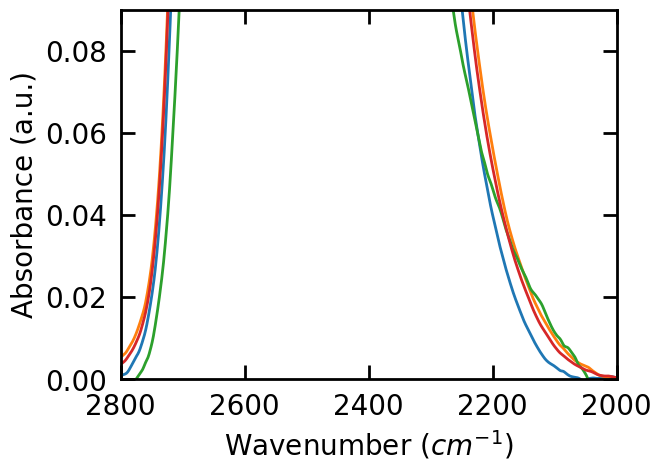

In [95]:

x = wb.values
z = df.values.T

list = []
for i in range(len(df.T)):
    list.append(str(i))
data = df.set_axis(list, axis='columns')

z = data.values.T

for i in range(len(df.T)):
    plt.plot(x, z.T[:, i])
plt.xlim(2800, 2000)
plt.ylim(0, 0.09)
plt.xlabel('Wavenumber ($cm^{-1}$)')
plt.ylabel('Absorbance (a.u.)')